##

# PA005: High Value Customer Identification (Insiders)


## Solution Planning (IOT)

### Input

1. Problema de negócio
    - Selecionar os clientes mais valiosos para integrar um programa de fidelização
2. Conjunto de dados
    - Vendas de um e-commerce online, durante o período de um ano

### Output

1. A identificação das pessoas que farão parte do programa de Insiders
2. Relatório com perguntas de negócio:

    - **1) Who are the people eligible to participate in the Insiders program?**

    - **2) How many customers will be part of the group?**

    - **3) What are the main characteristics of these customers?** 

    - **4) What percentage of revenue contribution comes from Insiders?**

    - **5) What is the billing expectation of this group for the coming months?**
    - **6) What are the conditions for a person to be eligible for Insiders? trashhold**
    - **7) What are the conditions for a person to be removed from Insiders?**
    - **8) What is the guarantee that the Insiders program is better than the rest of the base?**
    - **9) What actions can the marketing team take to increase revenue?**

### Tasks

**1) Who are the people eligible to participate in the Insiders program?**
    
    O que é ser elegível? O que são clientes de maior valor?
    
    Faturamento:
        
        - Alto ticket médio
        - Alto LTV
        - Baixa Recência
        - Alto basket size
        - Baixa probabilidade de Churn
        - Alta propensão de compras

    Custo:
        
        - Baixo taxa de devolução

    Experiência de compra:

        - Média alta das avaliações

**2) How many customers will be part of the group?**

    - Número total de clientes
    - % do grupo Insiders
    

**3) What are the main characteristics of these customers?** 

    - Escrever características do cliente:
        
        - Idade
        - Localização

    - Características do consumo:

        - Atributos da clusterização

**4) What percentage of revenue contribution comes from Insiders?**

    - Faturamento total do ano
    - Faturamento do grupo Insiders

**5) What is the billing expectation of this group for the coming months?**

    - LTV do grupo Insiders
    - Análise de Cohort

**6) What are the conditions for a person to be eligible for Insiders?**

    - Definir a periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser similar ou parecido com uma pessoa  do grupo

**7) What are the conditions for a person to be removed from Insiders?**

    - Definir a periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser desimilar ou parecido com uma pessoa  do grupo

**8) What is the guarantee that the Insiders program is better than the rest of the base?**

    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses

**9) What actions can the marketing team take to increase revenue?**

    - Desconto
    - Preferência de compra
    - Frete

## Benchmark Solution

### 1.0 Desk Research

## 0.0 Imports

### 0.1 Functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from plotly import express as px

from sklearn import cluster as c
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer

### 0.2 Load Dataset

In [2]:
df_raw = pd.read_csv('/home/feliperastelli/repos/FR_Insiders_Clustering/data/Ecommerce.csv', encoding= 'unicode_escape')

df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1)

## 1.0 Data Description

In [3]:
df1 = df_raw.copy()

### 1.1 Rename columns

In [4]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

### 1.2 Data dimensions

In [5]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of columns: 8


### 1.3 Data types

In [6]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.4 Check NA

In [7]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5 Replace NA

In [8]:
df1 = df1.dropna( subset=['description','customer_id'])
print('Removed data: {:.2f}'.format( 1-( df1.shape[0]/ df_raw.shape[0])))

Removed data: 0.25


In [9]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### 1.6 Change Dtype

In [10]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

### 1.7 Descriptive Statistics

## 2.0 Feature Engineering

In [11]:
df2 = df1.copy()

### 2.1 Feature Creation

In [12]:
df_ref = df2[['customer_id']].drop_duplicates(ignore_index=True)

In [13]:
# Gross Revenue ( Quantity * Price)
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last day purchase
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

## 3.0 Data Filtering

In [14]:
df3 = df_ref.copy()

## 4.0 EDA

In [15]:
df4 = df3.copy()

## 5.0 Data Preparation

In [16]:
df5 = df4.copy()

## 6.0 Feature Selection

In [17]:
df6 = df5.copy()

## 7.0 Hyperparameter Fine Tuning

In [18]:
x = df6.drop( columns=['customer_id'])

In [19]:
clusters = [2,3,4,5,6]

### 7.1 Within-Cluster Sum of Square (WSS)

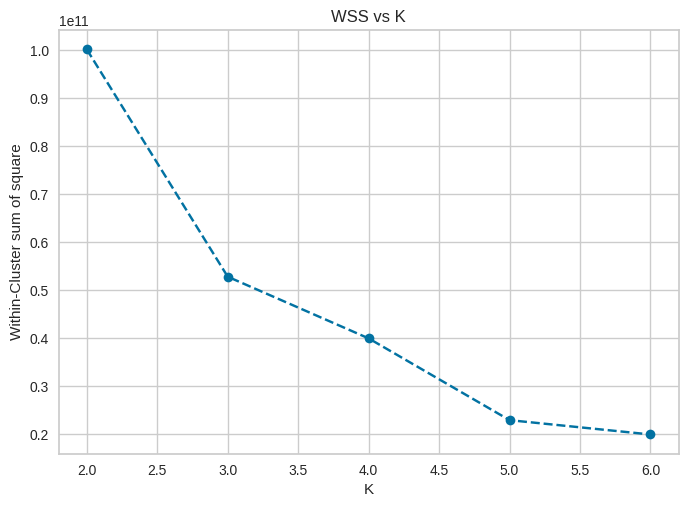

In [20]:
wss = []

for k in clusters:

    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit( x )

    # validation
    wss.append( kmeans.inertia_ )

# plot WSS
plt.plot( clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster sum of square')
plt.title('WSS vs K');

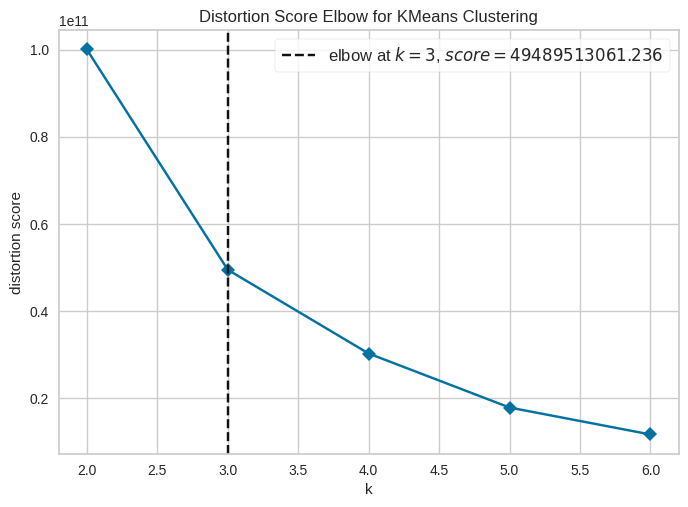

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False)
kmeans.fit(x)
kmeans.show()

### 7.2 Silhouete Score

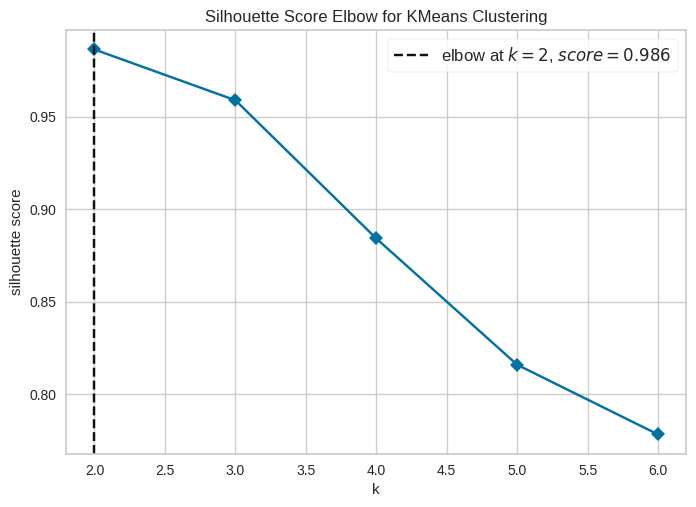

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False, metric='silhouette')
kmeans.fit(x)
kmeans.show()

## 8.0 Model Training

### 8.1 K-Means

In [23]:
# model definition
k = 3
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(x)

# clustering
labels = kmeans.labels_

#### 8.1.2 Cluster validation

In [24]:
# WSS
print('WSS value: {}'.format(kmeans.inertia_))

# SS
print('SS value: {}'.format(m.silhouette_score(x, labels, metric='euclidean')))


WSS value: 52830442008.00694
SS value: 0.9494677566681542


## 9.0 Cluster Analysis

In [25]:
df9 = df6.copy()
df9['cluster'] = labels

### 9.1 Visualization Inspection

In [26]:
fig = px.scatter_3d(df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
fig.show()

### 9.2 Cluster profile

In [30]:
# number of customer
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = round(100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum()),2)

# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster,df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency_days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster,df_avg_recency_days, how='inner', on='cluster')

# Avg frequency
df_avg_frequency = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster,df_avg_frequency, how='inner', on='cluster')


df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.15,1372.577826,92.257901,4.614533
1,1,6,0.14,182181.981667,7.166667,89.000000
2,2,31,0.71,40543.517742,13.290323,53.290323


### **Cluster 01: Insider Candidate**

- Number of customers: 6 (0,14% of customers)
- Average recency: 7 days
- Average purchases: 89 purchases
- Avg Gross revenue: $182.182,00

### **Cluster 02:**

- Number of customers: 31 (0,71% of customers)
- Average recency: 14 days
- Average purchases: 53 purchases
- Avg Gross revenue: $40.543,52

### **Cluster 03: Insider Candidate**

- Number of customers: 4.335 (99% of customers)
- Average recency: 92 days
- Average purchases: 5 purchases
- Avg Gross revenue: $1.372,0057

## 10.0 Deploy to Production